In [2]:
#importeren van lijsten die gebruikt worden in de code
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#de waardes van de constanten weergeven
k = 1.0565  #N/m
m = 4.2818e-09  #kg
gamma = 1.9217e-06  #kg/s
q = 6000
Fmax = 60e-09  #N
dt = 0.00009 #s

In [4]:
#berekening van de resonantiefrequentie en trillingstijd
f = 0.5 * np.pi * ((k / m) * (1 - gamma**2))**0.5
T = 1 / f

print(f)
print(T)

24674.106720243937
4.052831623604624e-05


In [5]:
#functie maakt lijsten met nullen
def listmaker (Q):
    q = np.zeros(Q)
    q[0:2] = 0
    return q

In [6]:
#aanmaken van lijsten met als waarde q
t = listmaker(q)
x = listmaker(q)
x2 = listmaker (q)
A2 = listmaker (q)
Fdrive = listmaker(q)

In [7]:
#for loop met een nieuwe tijd dat steeds de vorige tijd uit de lijst pakt en deze plus een waarde doet en dit voor elke waarde die in de lijst staat.
for i in range(5999):
    t [i + 1]= t[i]+ dt

In [8]:
#constante waardes uit de differtiaal vergelijking.
a = (k-2*m/(dt**2))/(m/(dt**2)+gamma/(2*dt))
b = (m/(dt**2)-gamma/(2*dt))/(m/(dt**2)+gamma/(2*dt))
c = Fmax/(m/(dt**2)+gamma/(2*dt))

In [9]:
#for loop met voor elke tijdstap een nieuwe waarde voor Fdrive
for i in range (6000):
    Fdrive[i] = c* np.sin(2*np.pi*f*t[i])

In [10]:
#for loop met voor elke waarde van x in de lijst vermenigvuldigd met een constante, min een constante vermenigvuldigd met de positie van x ervoor in de lijst, plus de Fdrive op dezelfde positie in die lijst
for i in range(q-1):
    x[i+1] = a*x[i] - b*x[i-1] + Fdrive[i]
#for loop met voor elke waarde van x in de lijst vermenigvuldigd met een constante, min de plek in de lijst vóór dat punt keer een constante, plus een constante
for i in range(q-1):
    x2[i+1] = a*x2[i] - b*x2[i-1] + c

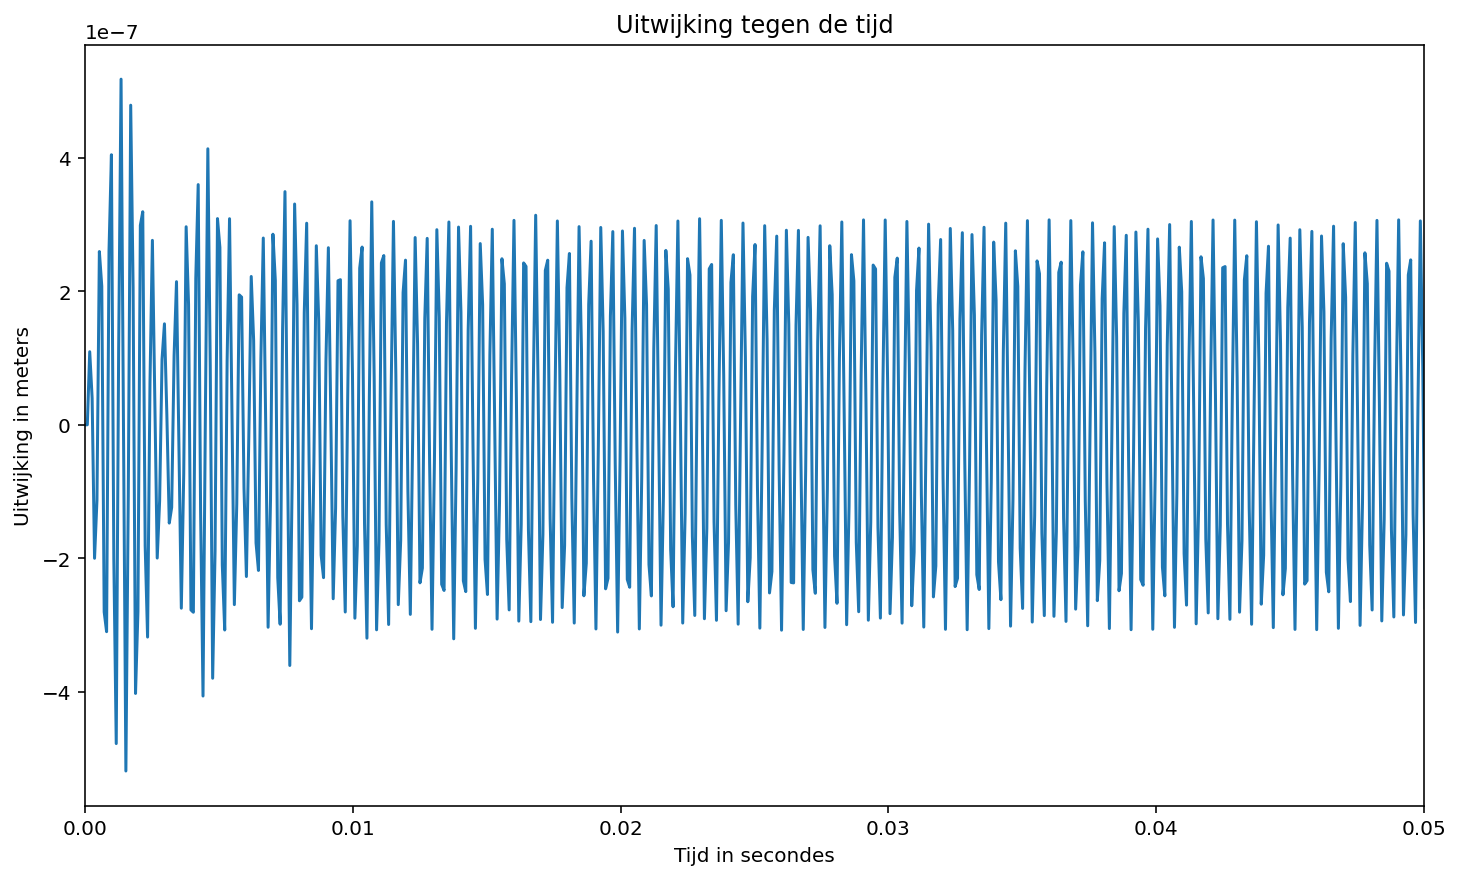

In [11]:
#plotten van de (t, x) grafiek
plt.plot(t, x)
plt.title('Uitwijking tegen de tijd')
plt.xlabel('Tijd in secondes')
plt.ylabel('Uitwijking in meters')
plt.xlim(0, 0.05)
#plt.ylim(0,8e-9)
plt.show()

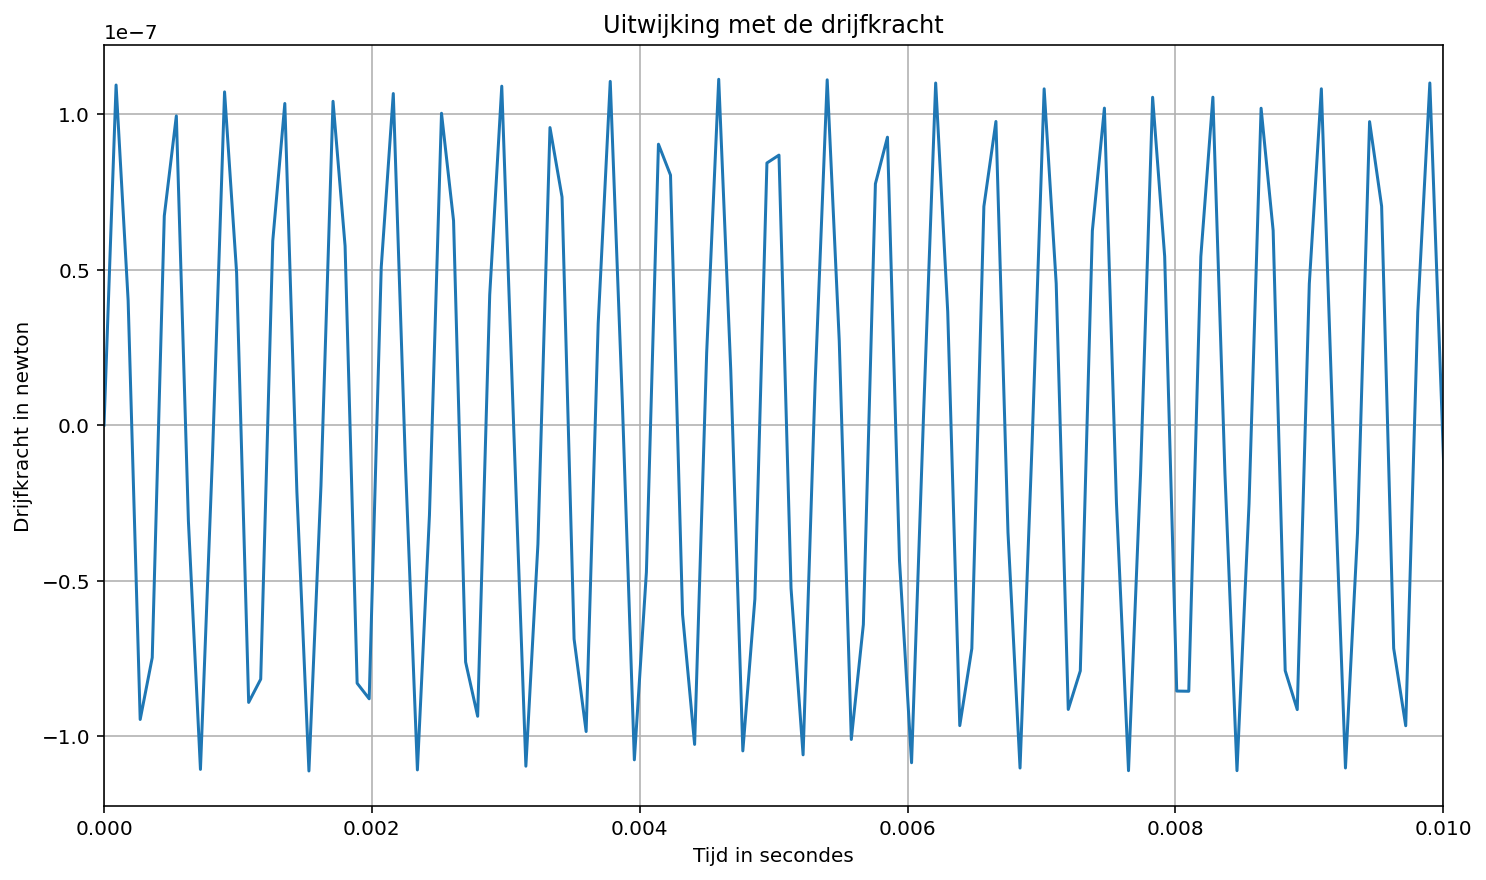

In [12]:
#plotten van de (t, Fdrive) grafiek
plt.plot(t, Fdrive)
plt.title('Uitwijking met de drijfkracht')
plt.xlabel('Tijd in secondes')
plt.ylabel('Drijfkracht in newton')
plt.xlim(0, 0.01)
plt.grid()
plt.show()

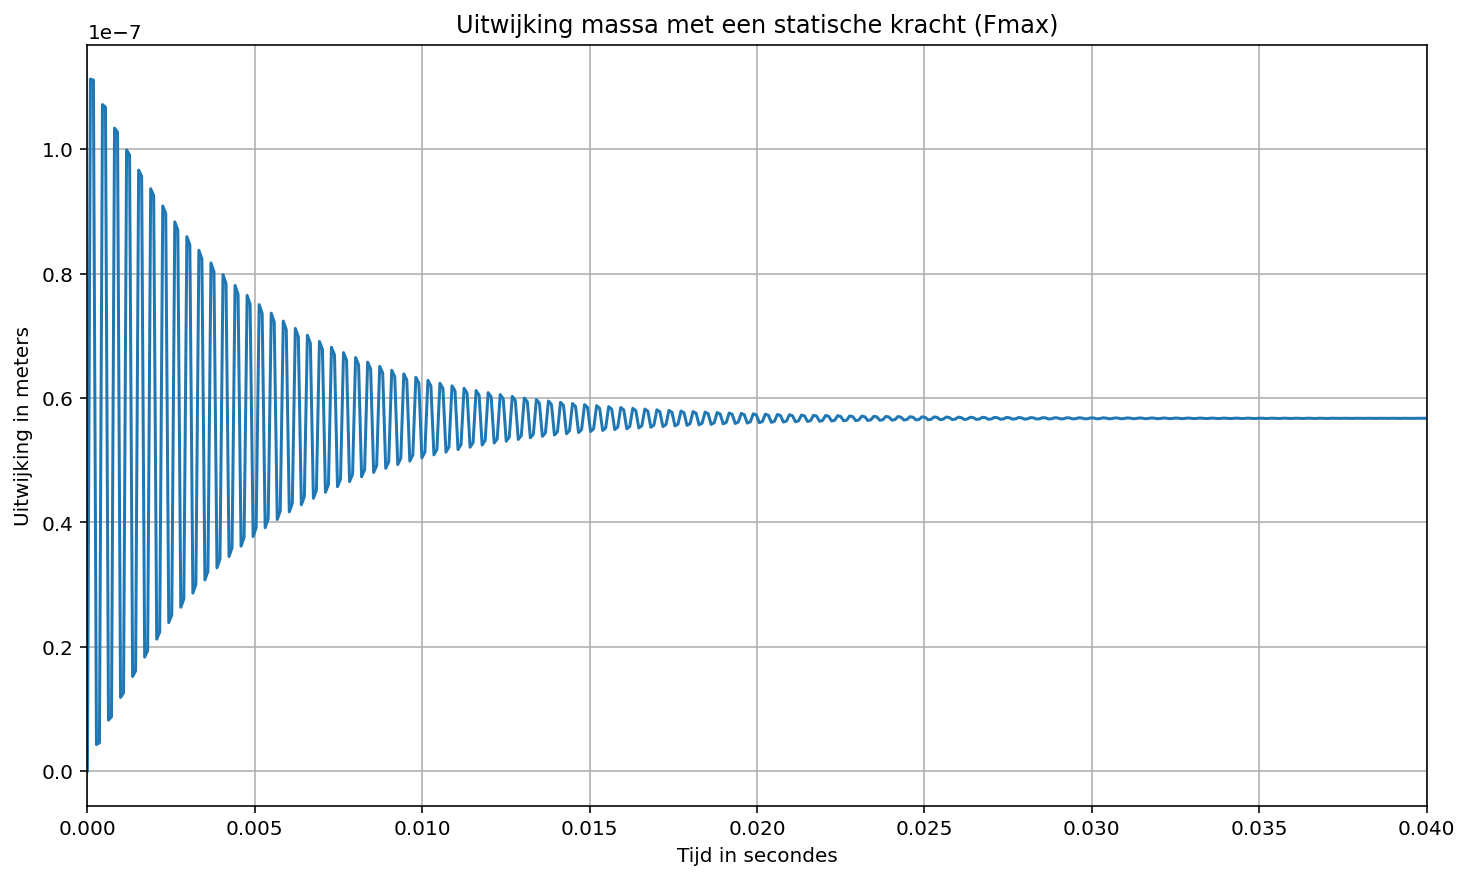

In [13]:
#plotten van de (t, x2) grafiek
plt.plot(t, x2)
plt.title('Uitwijking massa met een statische kracht (Fmax)')
plt.xlabel('Tijd in secondes')
plt.ylabel('Uitwijking in meters')
plt.grid()
plt.xlim(0, 0.04)
plt.show()

In [16]:
#while loop voor het isoleren van de maximum waardes
j = 1
f2 = []
A = []

while j <= 5000:
    for i in range(3000):
        Fdrive[i] = c*np.sin(2*np.pi*j*t[i])
        
    for i in range(2999):
        x[i+1] = a*x[i] - b*x[i-1] + Fdrive[i]
    xmax = max(x[2500:2999])
    A.append(xmax)
    f2.append(j)
    j+=1

2.8089197652381106e-06
1.4044598826190553e-06


(array([2717, 2718, 2719, 2720, 2721, 2722, 2723, 2724, 2725, 2726, 2727,
        2728, 2729, 2730, 2731, 2732, 2733, 2734, 2735, 2736, 2737, 2738,
        2739, 2740, 2741, 2742, 2743, 2744, 2745, 2746, 2747, 2748, 2749,
        2750, 2751, 2752, 2753, 2754, 2755, 2756, 2757, 2758, 2759, 2760,
        2761, 2762, 2763, 2764, 2765, 2766, 2767, 2768, 2769, 2770, 2771,
        2772, 2773, 2774, 2775, 2776, 2777, 2778, 2779, 2780, 2781, 2782,
        2783, 2784, 2785, 2786, 2787, 2788, 2789, 2790, 2791, 2792, 2793,
        2794, 2795, 2796, 2797, 2798, 2799, 2800, 2801, 2802, 2803, 2804,
        2805, 2806, 2807, 2808, 2809, 2810, 2811, 2812, 2813, 2814, 2815,
        2816, 2817, 2818, 2819, 2820, 2821, 2822, 2823, 2824, 2825, 2826,
        2827, 2828, 2829, 2830, 2831, 2832, 2833, 2834, 2835, 2836, 2837,
        2838, 2839]),)

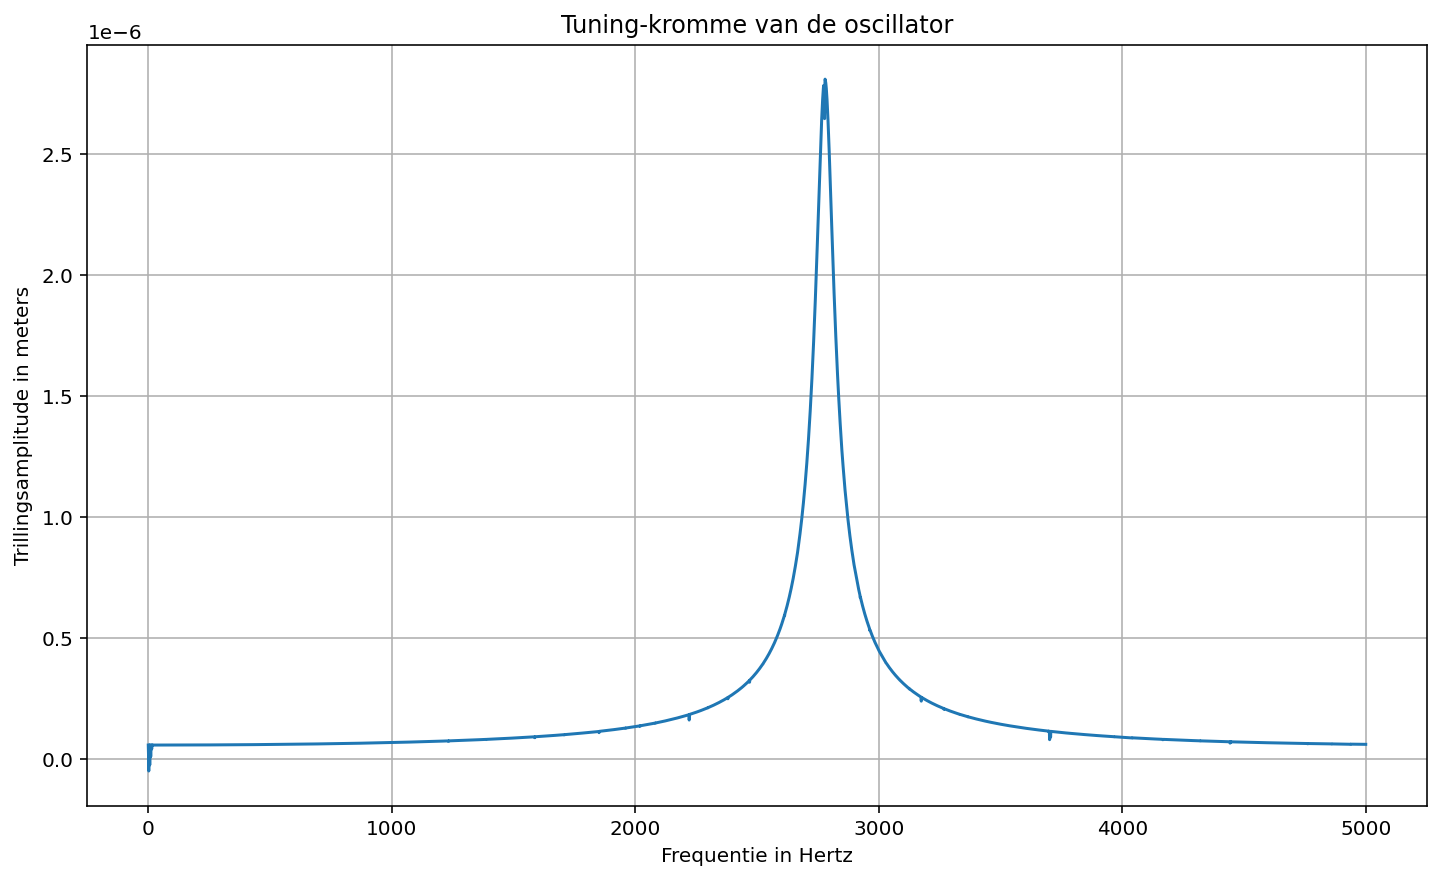

In [19]:
#plotten van (f2, A) grafiek
plt.plot(f2, A)
plt.title('Tuning-kromme van de oscillator')
#plt.xlim(0, 5000)
plt.xlabel('Frequentie in Hertz')
plt.ylabel('Trillingsamplitude in meters')
plt.grid()

#print de top
print(max(A))

#midden van de top bepalen voor FWHM en alle waardes waar dit midden van de top voorkomt op de x-as
A2 = max(A)/2
print(A2)
np.nonzero(A>=max(A)/2)


In [33]:
#berekenen FWHM
FWHM = f2[2840] - f2[2717]
FWHM


123

In [34]:
#uitrekenen factor drive oscillator
factor_drive_oscillator = FWHM / f
factor_drive_oscillator

0.0049849828970336876